## Import Dependency

In [274]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import os

## Data Acquisition

In [275]:
df = pd.read_csv(r"C:\Users\nene0\Desktop\Projects\kaggle_Used_Car_Regression\playground-series-s4e9\train.csv")

df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


- Target: `price`

|Feature|Type|Feature|Type|Feature|Type|Feature|Type|
|--------|------|--------|------|--------|------|--------|------|
|`id`|Alpha Numeric|`brand`|Categorical - Nominal|`model`|Categorical - Nominal|`model_year`|Numeric - Discrete|
|`milage`|Numeric - Continuous|`fuel_type`|Categorical - Nominal|`engine`|Categorical - Nominal|`transmission`|Categorical - Nominal|
|`ext_col`|Categorical - Nominal|`int_col`|Categorical - Nominal|`accident`|Categorical - Ordinal|`clean_title`|Categorical - Nominal|

In [277]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


## Data Cleaning

In [278]:
missing_values = df.isna().sum()

for column, values in missing_values.items():
    if values > 0:
        print(f"{column}: {values}")

fuel_type: 5083
accident: 2452
clean_title: 21419


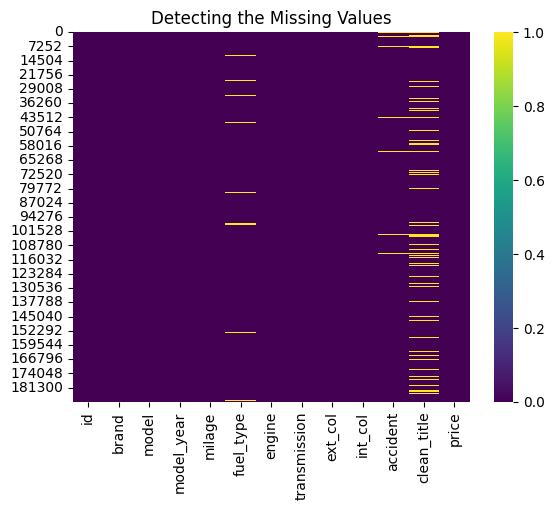

In [279]:
sns.heatmap(df.isna(), cmap='viridis')
plt.title('Detecting the Missing Values')

plt.show()

### Duplicated Value

In [280]:
df['id'].duplicated().sum()

0

In [281]:
df.drop(columns='id', inplace=True)

The `id` column is exactly same as the index, therefore we will drop right away.

### Outliers

In [282]:
df.describe()

,model_year,milage,price
count,188533.000000,188533.000000,1.885330e+05
mean,2015.829998,65705.295174,4.387802e+04
std,5.660967,49798.158076,7.881952e+04
min,1974.000000,100.000000,2.000000e+03
25%,2013.000000,24115.000000,1.700000e+04
50%,2017.000000,57785.000000,3.082500e+04
75%,2020.000000,95400.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


<Axes: >

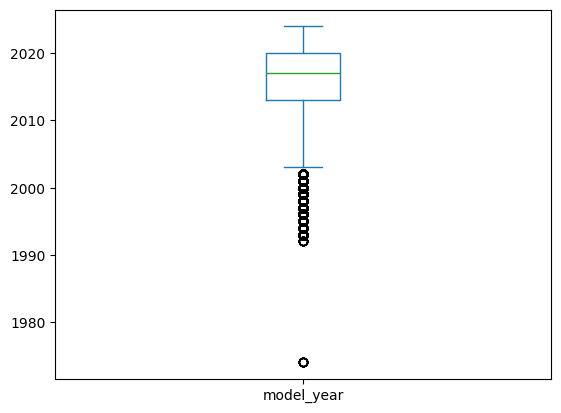

In [283]:
df['model_year'].plot.box()

In [284]:
df[df['model_year']==1974]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
8173,Dodge,Challenger R/T Scat Pack,1974,49000,–,–,5-Speed M/T,Green,Gray,None reported,Yes,29900
38565,Ford,Bronco,1974,38012,–,–,–,Thunder Gray,Dark Gray,None reported,Yes,84620
47488,Ford,Bronco,1974,109762,Gasoline,–,–,Tempest,–,NaN,NaN,13046
47837,Ford,Bronco XLT,1974,5856,–,–,6-Speed M/T,Black,Black,None reported,Yes,115000
55169,Ford,Thunderbird Deluxe,1974,174678,Gasoline,280.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Beige,None reported,Yes,29998
60702,Porsche,911 Carrera 4S,1974,102750,–,–,A/T,Gray,Gray,None reported,Yes,29000
71389,Ford,Bronco XLT,1974,54323,–,–,4-Speed A/T,Blue,Beige,None reported,Yes,23500
121193,Ford,Bronco,1974,7900,–,–,–,Gray,Gray,None reported,Yes,197499
127656,Lincoln,Town Car Base,1974,152000,–,–,A/T,White,Beige,None reported,Yes,9999
133985,Jaguar,F-PACE S,1974,58356,–,–,Automatic,Black,Ebony,None reported,NaN,115998


In [285]:
df['model_year'].value_counts(dropna=False, normalize=True, ascending=True)

model_year
1974    0.000064
1992    0.000074
1994    0.000488
1995    0.000541
1993    0.000743
2024    0.000859
1996    0.001002
1997    0.001655
1998    0.001819
1999    0.002938
2000    0.002960
2002    0.006800
2001    0.008137
2003    0.010110
2004    0.013632
2009    0.014406
2006    0.014926
2005    0.016597
2010    0.022463
2007    0.025863
2008    0.027348
2012    0.032329
2011    0.033230
2013    0.036047
2014    0.044634
2023    0.046512
2015    0.060409
2017    0.067861
2016    0.072645
2019    0.081731
2022    0.083534
2020    0.084060
2018    0.087062
2021    0.096524
Name: proportion, dtype: float64

<Axes: >

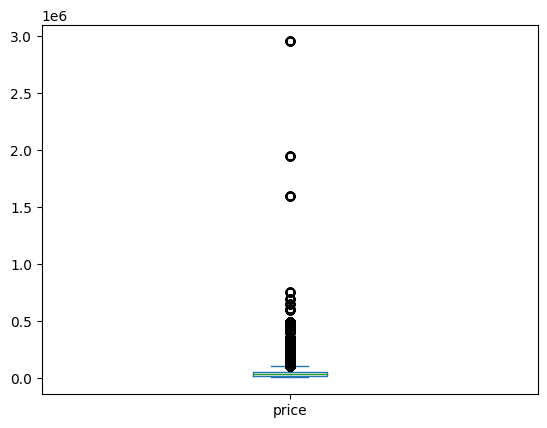

In [286]:
df['price'].plot.box()

In [287]:
df[df['price'] > 1500000]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
220,Ford,F-150 XLT,2021,26315,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Agate Black Metallic,Black,None reported,Yes,2954083
1880,Chrysler,300C Base,2003,55900,Gasoline,340.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,5-Speed A/T,Beige,Beige,None reported,Yes,2954083
2964,Porsche,911 R,2023,714,Gasoline,4.0L H6 24V GDI DOHC,6-Speed Manual,White,Gray,None reported,Yes,1950995
4164,Rolls-Royce,Ghost Base,2016,38800,Gasoline,563.0HP 6.7L 12 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,1599000
8789,Lamborghini,Gallardo LP570-4 Superleggera,2011,3254,Gasoline,5.2L V10 40V GDI DOHC,7-Speed Automatic with Auto-Shift,Nero Noctis,Nero Ade,None reported,Yes,1950995
...,...,...,...,...,...,...,...,...,...,...,...,...
183262,Bentley,Continental GT Speed,2022,22001,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,1950995
183468,Bentley,Continental GT V8,2021,59766,Gasoline,4.0L V8 32V GDI DOHC Twin Turbo,8-Speed Automatic,Dark Sapphire,Linen,None reported,Yes,2954083
185197,Ford,F-250 King Ranch,2022,44457,Diesel,6.7L V8 32V DDI OHV Turbo Diesel,Automatic,Summit White,Medium Earth Gray,At least 1 accident or damage reported,Yes,1950995
186234,Land,Rover Range Rover Sport HSE,2017,2437,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,A/T,Black,Black,None reported,Yes,1599000


In [288]:
df[df['price'] > 1500000]['price'].unique()

array([2954083, 1950995, 1599000], dtype=int64)

The `model_year` feature contains outliers where some cars are marked as being from the year 1974, making them 50 years old. Since there are only a few cars with the `model_year` 1974, I will remove these outliers. Similarly, the price feature has outliers where car prices exceed 1.5 million dollars. These outliers follow a pattern, with prices being listed as 2,954,083, 1,950,995, or 1,599,000. To ensure better performance of the prediction model, I will also drop these price outliers.

In [289]:
df[(df['model_year']==1974)|(df['price'] > 1500000)]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
220,Ford,F-150 XLT,2021,26315,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Agate Black Metallic,Black,None reported,Yes,2954083
1880,Chrysler,300C Base,2003,55900,Gasoline,340.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,5-Speed A/T,Beige,Beige,None reported,Yes,2954083
2964,Porsche,911 R,2023,714,Gasoline,4.0L H6 24V GDI DOHC,6-Speed Manual,White,Gray,None reported,Yes,1950995
4164,Rolls-Royce,Ghost Base,2016,38800,Gasoline,563.0HP 6.7L 12 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,1599000
8173,Dodge,Challenger R/T Scat Pack,1974,49000,–,–,5-Speed M/T,Green,Gray,None reported,Yes,29900
...,...,...,...,...,...,...,...,...,...,...,...,...
183262,Bentley,Continental GT Speed,2022,22001,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,1950995
183468,Bentley,Continental GT V8,2021,59766,Gasoline,4.0L V8 32V GDI DOHC Twin Turbo,8-Speed Automatic,Dark Sapphire,Linen,None reported,Yes,2954083
185197,Ford,F-250 King Ranch,2022,44457,Diesel,6.7L V8 32V DDI OHV Turbo Diesel,Automatic,Summit White,Medium Earth Gray,At least 1 accident or damage reported,Yes,1950995
186234,Land,Rover Range Rover Sport HSE,2017,2437,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,A/T,Black,Black,None reported,Yes,1599000


In [267]:
df.drop(index=df[(df['model_year']==1974)|(df['price'] > 1500000)].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [269]:
df.shape

(188373, 12)

### Missing Values

#### fuel_type

In [150]:
df[df['fuel_type'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
11,Tesla,Model S P100D,2015,81500,NaN,Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,19000
32,Tesla,Model S P100D,2018,30300,NaN,518.0HP Electric Motor Electric Fuel System,A/T,White,White,None reported,Yes,64000
51,Tesla,Model 3 Long Range,2020,38360,NaN,Dual Motor - Standard,Automatic,White,Black,None reported,NaN,59598
52,Tesla,Model X 75D,2021,88000,NaN,518.0HP Electric Motor Electric Fuel System,1-Speed A/T,Black,Black,None reported,Yes,53600
161,Tesla,Model S Long Range,2021,9500,NaN,670.0HP Electric Motor Electric Fuel System,A/T,White,Beige,None reported,Yes,89999
...,...,...,...,...,...,...,...,...,...,...,...,...
188208,Ford,Mustang Mach-E Premium,2022,2058,NaN,Standard Range Battery,Automatic CVT,Red,Black,None reported,NaN,27785
188295,Ford,Mustang Mach-E GT,2022,8000,NaN,480.0HP Electric Motor Electric Fuel System,A/T,Orange,White,None reported,Yes,115000
188302,Ford,Mustang Mach-E GT,2023,9000,NaN,480.0HP Electric Motor Electric Fuel System,A/T,Orange,Black,None reported,Yes,85000
188324,Ford,Model X P100D,2018,52000,NaN,534.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,Black,None reported,Yes,45000


In [151]:
df['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

We see there are some values that we need to look over which are '-' and 'not supported' along with the missing values. There seems like a pattern where all the missing values are an electric cars.

In [152]:
df[df['brand'] == 'Tesla'] # Tesla don't make Gasoline car so there is a wrong value.

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
11,Tesla,Model S P100D,2015,81500,NaN,Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,19000
32,Tesla,Model S P100D,2018,30300,NaN,518.0HP Electric Motor Electric Fuel System,A/T,White,White,None reported,Yes,64000
51,Tesla,Model 3 Long Range,2020,38360,NaN,Dual Motor - Standard,Automatic,White,Black,None reported,NaN,59598
52,Tesla,Model X 75D,2021,88000,NaN,518.0HP Electric Motor Electric Fuel System,1-Speed A/T,Black,Black,None reported,Yes,53600
161,Tesla,Model S Long Range,2021,9500,NaN,670.0HP Electric Motor Electric Fuel System,A/T,White,Beige,None reported,Yes,89999
...,...,...,...,...,...,...,...,...,...,...,...,...
188071,Tesla,Model 3 Performance,2021,23250,NaN,455.0HP Electric Motor Electric Fuel System,1-Speed A/T,Silver,White,None reported,Yes,29000
188142,Tesla,Model Y Performance,2022,13500,NaN,455.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,70000
188179,Tesla,Model S 100D,2018,28333,NaN,518.0HP Electric Motor Electric Fuel System,1-Speed A/T,Silver,Black,At least 1 accident or damage reported,Yes,49999
188220,Tesla,Model S Performance,2021,10500,Gasoline,778.0HP Electric Motor Electric Fuel System,8-Speed A/T,Black,Beige,None reported,Yes,98900


In [153]:
df[df['brand'] == 'Rivian'] # Rivian also don't make Gasoline car so there is a wrong value.

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
44,Rivian,R1S Adventure Package,2023,7000,Gasoline,835.0HP Electric Motor Electric Fuel System,8-Speed A/T,Green,Black,None reported,Yes,145000
901,Rivian,R1S Adventure Package,2023,8400,NaN,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,93000
981,Rivian,R1S Adventure Package,2021,28200,NaN,835.0HP Electric Motor Electric Fuel System,A/T,Silver,White,None reported,Yes,29600
1560,Rivian,R1S Adventure Package,2023,12500,NaN,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,Silver,Black,None reported,Yes,19395
2692,Rivian,R1S Adventure Package,2023,17500,–,–,A/T,Gray,Black,None reported,Yes,133500
...,...,...,...,...,...,...,...,...,...,...,...,...
187754,Rivian,R1S Adventure Package,2023,2700,NaN,835.0HP Electric Motor Electric Fuel System,A/T,Black,White,None reported,Yes,92500
187866,Rivian,R1S Launch Edition,2022,8681,NaN,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,Green,None reported,Yes,87500
187953,Rivian,R1S Adventure Package,2023,2000,NaN,835.0HP Electric Motor Electric Fuel System,A/T,Black,Gray,None reported,Yes,89000
188088,Rivian,R1S Launch Edition,2022,2525,Gasoline,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,Orange,White,None reported,Yes,81500


In [154]:
df[df['brand'] == 'Lucid'] # Lucid also don't make Gasoline car so there is a wrong value.

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
2254,Lucid,Air Grand Touring,2007,156875,Gasoline,262.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Red,Black,None reported,Yes,9499
5137,Lucid,Air Grand Touring,2022,51000,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,None reported,Yes,120990
6268,Lucid,Air Grand Touring,2022,11111,Gasoline,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,None reported,Yes,63000
9517,Lucid,Air Grand Touring,2023,3552,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Beige,None reported,Yes,53900
10147,Lucid,Air Grand Touring,2021,14550,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Beige,None reported,Yes,33333
...,...,...,...,...,...,...,...,...,...,...,...,...
179176,Lucid,Air Grand Touring,2022,4786,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,None reported,Yes,90000
179404,Lucid,Air Grand Touring,2021,33012,NaN,355.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,Beige,None reported,Yes,42000
180649,Lucid,Air Grand Touring,2023,7900,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,–,None reported,Yes,82500
181034,Lucid,Air Grand Touring,2011,52500,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Green,Beige,None reported,Yes,28000


In [155]:
electric_brands = ['Tesla', 'Lucid', 'Rivian']

# Fill in the 'fuel_type' with 'Electric' if the brand is in the electric_brands list.
df.loc[df['brand'].isin(electric_brands), 'fuel_type'] = 'Electric'

# Fill in missing values or update to the correct value using the 'engine' column.
df.loc[((df['engine'].str.contains('Electric|Battery'))&(df['fuel_type'].isna())), 'fuel_type'] = 'Electric'
df.loc[((df['engine'].str.contains('Hybrid'))&(df['fuel_type'].isna()|(df['fuel_type']=='–'))), 'fuel_type'] = 'Hybrid'
df.loc[((df['engine'].str.contains('Gasoline'))&(df['fuel_type'].isna()|(df['fuel_type']=='not supported')|(df['fuel_type']=='–'))), 'fuel_type'] = 'Gasoline'
df.loc[((df['engine'].str.contains('Diesel'))&(df['fuel_type'].isna())), 'fuel_type'] = 'Diesel'
df.loc[((df['engine'].str.contains('Hydrogen'))&(df['fuel_type']=='not supported')), 'fuel_type'] = 'Hydrogen' # Toyota has a Hydrogen Car!

# Fill in missing values or update to the correct value using the 'model' column.
df.loc[((df['model'].str.contains('EV|Electric'))&(df['fuel_type'].isna())), 'fuel_type'] = 'Electric' # EV = Electric Vehicle

# Rest are all filled with the value 'Gasoline'ArithmeticError
df.loc[((df['fuel_type'].isna())|(df['fuel_type'].str.contains('not supported|–'))), 'fuel_type'] = 'Gasoline'

To simplify the process, I began by filling in missing values for brands that exclusively produce electric cars. Next, I checked the `engine` field and, if it contained terms such as "electric," "battery," "hybrid," "gasoline," "diesel," or "hydrogen," I updated or filled in the corresponding fuel type. If these keywords were missing from the `engine` field, I used the `model` values to fill in the fuel type. Finally, any remaining missing values, including those marked as '-', or 'not supported,' were filled with 'Gasoline,' as gasoline-powered cars are the most common.

In [156]:
df['fuel_type'].isna().sum()

0

#### accident

In [157]:
df[df['accident'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
87,RAM,2500 Big Horn,2012,95400,Diesel,350.0HP 6.7L Straight 6 Cylinder Engine Diesel...,6-Speed A/T,Black,Black,NaN,NaN,27899
134,Jeep,Gladiator Sport,2021,61341,Gasoline,3.6L V6 24V MPFI DOHC,8-Speed Automatic,Firecracker Red Clearcoat,Black,NaN,NaN,32455
164,Acura,RDX w/A-Spec Package,2023,39517,Gasoline,2.0 Liter DOHC Turbo,Automatic,Gray,Black,NaN,NaN,29645
332,Mercedes-Benz,SLK-Class SLK320,2001,170000,Gasoline,215.0HP 3.2L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Black,Beige,NaN,NaN,6000
360,RAM,2500 SLT,2016,69600,Gasoline,410.0HP 6.4L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Gray,NaN,NaN,35900
...,...,...,...,...,...,...,...,...,...,...,...,...
187726,Chevrolet,Corvette Stingray w/2LT,2022,16100,Gasoline,490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,Blue,NaN,NaN,36000
187981,Chevrolet,Silverado 1500 RST,2021,40929,Gasoline,5.3L V8 16V GDI OHV,10-Speed Automatic,Shadow Gray Metallic,Jet Black,NaN,NaN,41885
188265,Volvo,XC90 T6 Momentum,2016,25000,Gasoline,316.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,NaN,NaN,52500
188345,Ford,F-150 XLT,2020,49899,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,Automatic,Gray,Black,NaN,NaN,52645


In [158]:
df['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [159]:
df['accident'].fillna('Unknown', inplace=True)

Since we don't know if there was an accident or not, we will fill in the value with 'Unknown'.

#### clean_title

In [160]:
df[df['clean_title'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
20,Land,Rover Defender S,2023,7978,Gasoline,5.2L V10 40V PDI DOHC,8-Speed Automatic,Santorini Black Metallic,Black,None reported,NaN,41998
45,RAM,1500 Laramie,2022,27352,Gasoline,5.7L V8 16V MPFI OHV,8-Speed Automatic,Diamond Black,Black,None reported,NaN,42599
51,Tesla,Model 3 Long Range,2020,38360,Electric,Dual Motor - Standard,Automatic,White,Black,None reported,NaN,59598
60,Mercedes-Benz,GLS 450 Base 4MATIC,2017,44147,Gasoline,3.0L V6 24V GDI DOHC Twin Turbo,9-Speed Automatic,White,Parchment.,At least 1 accident or damage reported,NaN,29999
70,McLaren,570S Spider,2023,3254,Gasoline,3.8L V8 32V MPFI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,Vega Blue,Black,None reported,NaN,92500
...,...,...,...,...,...,...,...,...,...,...,...,...
188347,Chevrolet,Corvette Stingray w/3LT,2023,3053,Gasoline,490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,Unknown,NaN,61999
188351,Land,Rover Range Rover Velar P380 SE R-Dynamic,2022,15198,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Firenze Red,Ebony,None reported,NaN,23739
188353,Lexus,GS 350 F Sport,2022,82046,Gasoline,3.5L V6 24V PDI DOHC,8-Speed Automatic,Caviar,Black,None reported,NaN,48990
188360,Mercedes-Benz,GLC 300 GLC 300,2022,18031,Gasoline,2.0 Liter Turbo,Automatic,White,Black,None reported,NaN,39998


In [161]:
df['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [162]:
df['clean_title'].fillna('Unknown', inplace=True)

Same thing, we don't know if the car has a clean title or not, we will fill in the value with 'Unknown'.

In [163]:
df.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

### Validating Values

#### Numeric Data

In [164]:
df['model_year'].unique()

array([2007, 2002, 2017, 2021, 2018, 2016, 2020, 2015, 2011, 2013, 2023,
       2019, 2012, 2014, 2008, 2009, 2022, 2003, 2005, 2001, 2006, 2000,
       2010, 2004, 1997, 1998, 1999, 1994, 1993, 1996, 1995, 2024, 1992],
      dtype=int64)

<Axes: >

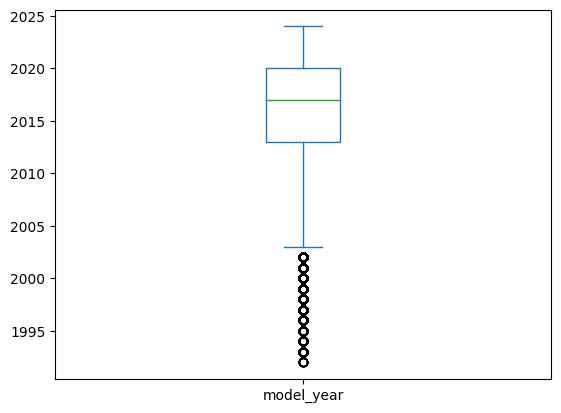

In [165]:
df['model_year'].plot.box()

In [166]:
df['model_year'].min()

1992

After removing the outliers from the earlier stage, we have new minimum of `model_year` at 1992.

In [167]:
df['milage'].min(), df['milage'].max()

(100, 405000)

<Axes: >

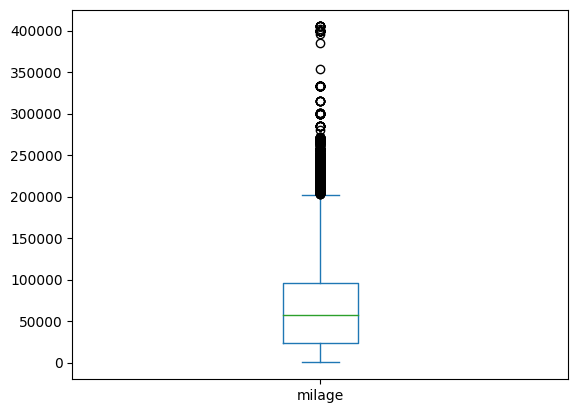

In [168]:
df['milage'].plot.box()

In [169]:
df[['model_year', 'milage']].corr()

,model_year,milage
model_year,1.0000,-0.6715
milage,-0.6715,1.0000


The `model_year` and a `milage` are negatively correlated meaning that older the car, higher the milage used.

#### Categorical Data

In [170]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188373 entries, 0 to 188372
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188373 non-null  object
 1   model         188373 non-null  object
 2   model_year    188373 non-null  int64 
 3   milage        188373 non-null  int64 
 4   fuel_type     188373 non-null  object
 5   engine        188373 non-null  object
 6   transmission  188373 non-null  object
 7   ext_col       188373 non-null  object
 8   int_col       188373 non-null  object
 9   accident      188373 non-null  object
 10  clean_title   188373 non-null  object
 11  price         188373 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.2+ MB


In [172]:
# Check which columns contain the '–' value.

df.apply(lambda x: (x == '–').sum())

brand              0
model              0
model_year         0
milage             0
fuel_type          0
engine           913
transmission      82
ext_col          364
int_col         4520
accident           0
clean_title        0
price              0
dtype: int64

In [173]:
# Replace all the '–' values to NaN.

df.replace('–', np.nan, inplace=True) # *** Note to myself -> When building a pipeline make sure to do this initially to make things less complicated.

In [174]:
df.isna().sum() # Now all '–' value is NaN where we can work more easily.

brand              0
model              0
model_year         0
milage             0
fuel_type          0
engine           913
transmission      82
ext_col          364
int_col         4520
accident           0
clean_title        0
price              0
dtype: int64

##### Color (Interior and Exterior)

In [175]:
# Since the exact color for both the exterior and interior of the car is unknown, we will mark it as ‘Unknown’.

df['ext_col'].fillna('Unknown', inplace=True)
df['int_col'].fillna('Unknown', inplace=True)

df['ext_col'] = df['ext_col'].str.title()
df['int_col'] = df['int_col'].str.title()

In [176]:
# df['ext_col'].unique()

In [177]:
# color_list = ['Gray', 'Blue', 'Black', 'Green', 'Pink', 'Red', 'Silver', 'Yellow', 'Grey', 'White', 'Orange', 'Brown', 'Beige',
#  'Gold', 'Bronze', 'Graphite']

# # Function to match and return the color
# def match_color(ext_col):
#     for color in color_list:
#         if color.lower() in ext_col.lower():
#             return color
#     return ext_col

# # Apply the function to the 'ext_col' column
# df['ext_color_hue'] = df['ext_col'].apply(match_color)

In [178]:
# df['ext_color_hue'].unique()

##### Transmission

In [179]:
df[df['transmission'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1538,Porsche,911 Carrera S Cabriolet,2007,28844,Gasoline,3.0 Liter,NaN,Red,Black,None reported,Unknown,107998
7811,Porsche,911 Carrera S,2019,36670,Gasoline,3.0 Liter,NaN,Red,Unknown,None reported,Unknown,85998
7834,Porsche,Macan S,2021,29136,Gasoline,3.0 Liter,NaN,Silver,Red,None reported,Unknown,77900
8961,INFINITI,G37 x,2018,9989,Gasoline,328.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,NaN,Black,Black,None reported,Yes,185950
9057,Volkswagen,Jetta GLX VR6,1993,1585,Gasoline,NaN,NaN,Arctic White,Gray,None reported,Unknown,142998
...,...,...,...,...,...,...,...,...,...,...,...,...
179898,Ford,Bronco,2022,11500,Gasoline,275.0HP 2.3L 4 Cylinder Engine Gasoline Fuel,NaN,Gray,Unknown,Unknown,Unknown,59000
182721,Ford,Bronco Raptor,2020,18051,Gasoline,NaN,NaN,Shadow Gray Metallic,Black/Gun Metal,At least 1 accident or damage reported,Yes,73897
184320,Porsche,911 Carrera 4S,2020,3099,Gasoline,3.0 Liter,NaN,Black,Red,None reported,Unknown,134999
184394,Porsche,911 Carrera S,2022,12758,Gasoline,3.0 Liter,NaN,Red,Unknown,None reported,Unknown,187900


In [180]:
def create_disctionary(data, group, column):
    mode = data.groupby(group)[column].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
    my_dict = mode.set_index(group)[column].to_dict()
    return my_dict

In [181]:
# Get the mode of the transmission by model.

mode_transmission = df.groupby('model')['transmission'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

mode_transmission['transmission'].unique()

array(['6-Speed M/T', '6-Speed A/T', 'A/T',
       'Transmission w/Dual Shift Mode', '8-Speed Automatic',
       '8-Speed A/T', '1-Speed A/T', 'Automatic', '5-Speed M/T',
       '5-Speed A/T', '7-Speed A/T', '7-Speed Automatic with Auto-Shift',
       '5-Speed Automatic', '9-Speed A/T', '9-Speed Automatic',
       'Automatic CVT', 'CVT Transmission', '4-Speed A/T',
       '10-Speed Automatic', '10-Speed A/T', 'M/T', '6-Speed Automatic',
       '8-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift', '2-Speed A/T',
       '1-Speed Automatic', 'Variable'], dtype=object)

In [182]:
transmission_dict = mode_transmission.set_index('model')['transmission'].to_dict()

transmission_dict

{'124 Spider Abarth': '6-Speed M/T',
 '128 i': '6-Speed A/T',
 '135 i': 'A/T',
 '135 is': 'Transmission w/Dual Shift Mode',
 '1500 Big Horn': '8-Speed Automatic',
 '1500 Cheyenne': 'A/T',
 '1500 Cheyenne Extended Cab': 'A/T',
 '1500 Classic SLT': '8-Speed Automatic',
 '1500 Classic Tradesman': '8-Speed A/T',
 '1500 Classic Warlock': '8-Speed Automatic',
 '1500 Laramie': '8-Speed Automatic',
 '1500 Limited': '8-Speed A/T',
 '1500 Longhorn': '8-Speed Automatic',
 '1500 Rebel': '8-Speed A/T',
 '1500 SLT': '8-Speed A/T',
 '1500 Sport': '8-Speed A/T',
 '1500 TRX': '8-Speed A/T',
 '1500 Tradesman/Express': '8-Speed A/T',
 '2 Launch Edition': '1-Speed A/T',
 '200 C': 'A/T',
 '200 Limited': 'A/T',
 '228 Gran Coupe i xDrive': 'Automatic',
 '228 i': '6-Speed M/T',
 '230 i': '8-Speed A/T',
 '240SX Base': '5-Speed M/T',
 '2500 Big Horn': '6-Speed A/T',
 '2500 Laramie': '6-Speed A/T',
 '2500 Longhorn': '6-Speed A/T',
 '2500 Powerwagon': '6-Speed A/T',
 '2500 SLT': '6-Speed A/T',
 '2500 Tradesman': 

In [183]:
# Fill in the missing values using the transmission dictionary.

df['transmission'] = df.apply(lambda row: transmission_dict[row['model']] if pd.isna(row['transmission']) else row['transmission'], axis=1)

##### Engine

In [184]:
df[df['engine'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
531,Dodge,Challenger R/T Scat Pack,2021,35000,Gasoline,NaN,8-Speed A/T,Blue,Gray,None reported,Yes,48000
1154,Ford,Mustang GT Premium,2017,143600,Gasoline,NaN,6-Speed M/T,White,Black,At least 1 accident or damage reported,Yes,31000
1306,Toyota,Land Cruiser Base,1994,138033,Gasoline,NaN,A/T,Green,Beige,None reported,Yes,11999
1361,Ford,Mustang EcoBoost Premium,2016,43000,Gasoline,NaN,A/T,Blue,Black,None reported,Yes,15500
1740,Chevrolet,Protege DX,1993,94200,Gasoline,NaN,A/T,Red,Gray,None reported,Yes,7599
...,...,...,...,...,...,...,...,...,...,...,...,...
187240,Mazda,MX-5 Miata Base,1993,90200,Gasoline,NaN,5-Speed M/T,Gray,Black,At least 1 accident or damage reported,Yes,11500
187505,Mercedes-Benz,SLS AMG Base,1993,14586,Gasoline,NaN,A/T,Red,Silver,None reported,Yes,65000
187661,Chrysler,Pacifica Touring,2017,57300,Gasoline,NaN,9-Speed A/T,Blue,Black,None reported,Yes,31700
187805,Mercedes-Benz,C-Class 4MATIC Sedan,1993,22703,Gasoline,NaN,A/T,Gray,Unknown,None reported,Yes,220000


In [185]:
# Do the same thing for the 'engine' column.

engine_dict = create_disctionary(df, 'model', 'engine')
df['engine'] = df.apply(lambda row: engine_dict[row['model']] if pd.isna(row['engine']) else row['engine'], axis=1)

In [186]:
df[df['engine'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
16308,Mercury,Capri XR2,1993,156193,Gasoline,None,5-Speed A/T,White,Unknown,None reported,Yes,10000
21247,Mercury,Capri XR2,2002,135000,Gasoline,None,4-Speed A/T,Green,Green,None reported,Yes,17999
57185,Mercury,Capri XR2,1999,120644,Gasoline,None,4-Speed A/T,Gray,Gray,None reported,Yes,16000
79673,Volvo,850 Turbo,2018,100600,Gasoline,None,8-Speed A/T,White,Gray,At least 1 accident or damage reported,Yes,48600
103000,Volvo,850 Turbo,1995,50000,Gasoline,None,6-Speed M/T,White,Unknown,None reported,Yes,33490
115935,Volvo,850 Turbo,1995,85095,Gasoline,None,A/T,Green,Gray,None reported,Yes,54000
130547,Volvo,850 Turbo,1995,7100,Gasoline,None,6-Speed M/T,Gold,Gray,None reported,Yes,37500
133746,Volvo,850 Turbo,1995,123000,Gasoline,None,A/T,Blue,Beige,At least 1 accident or damage reported,Yes,9995
138565,Mercury,Capri XR2,1994,120644,Gasoline,None,5-Speed M/T,Green,Gray,None reported,Yes,3900
163048,Mercury,Capri XR2,1993,120644,Gasoline,None,6-Speed M/T,Green,Gray,None reported,Yes,429998


In [187]:
df['engine'].fillna(df['engine'].mode()[0], inplace=True)

In [188]:
df.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

##### Model & Brand

In [189]:
df['brand'].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

In [190]:
# Update the brand 'Land' to correct brand name 'Land Rover'.

df.loc[df['brand']=='Land', 'brand'] = 'Land Rover'

In [191]:
df[df['model'].str.contains('911 Carrera')]['brand'].unique()

array(['Porsche', 'Hyundai', 'Toyota', 'Volvo', 'BMW', 'Ford',
       'Mercedes-Benz', 'Aston', 'Lincoln', 'Cadillac', 'Maserati', 'Kia',
       'Jaguar', 'Mazda', 'Genesis'], dtype=object)

In [192]:
df[(df['brand']=='BMW')&(df['model'].str.contains('911 Carrera'))]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
25599,BMW,911 Carrera 4,2016,11250,Gasoline,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,7-Speed A/T,Green,Black,None reported,Yes,15000


In [193]:
df[df['brand']=='Toyota']['model'].unique()

array(['Tundra SR5', 'Sequoia Limited', 'Tacoma PreRunner',
       '86 860 Special Edition', 'Camry SE', 'Highlander XLE',
       'Sequoia Platinum', 'Camry Solara SLE', '4Runner SR5', 'Camry LE',
       'Highlander Limited Platinum', 'Highlander Limited',
       'Camry Solara SLE V6', 'Highlander SE', '4Runner SR5 Premium',
       'Tundra Limited', 'Camry Hybrid Base', 'Avalon XLE',
       'Grand Cherokee L Laredo', 'Tundra SR5 Access Cab',
       'Land Cruiser Base', 'Tundra SR5 Double Cab', 'Tacoma Double Cab',
       'Matrix XR', 'Tacoma TRD Sport', 'C-HR LE', 'Camry Solara SE',
       'Sequoia SR5', 'Tacoma SR5', 'Highlander Hybrid Limited Platinum',
       '4Runner Trail', 'Camry Hybrid XLE', 'Tacoma SR',
       'Supra A91 Edition', 'GR86 Premium', 'FJ Cruiser Base',
       '911 Carrera 4 GTS', 'Tundra TRD Pro', 'Avalon Limited',
       'Sienna LE', 'Prius v Three', '86 Base', 'WRX Limited',
       'Camry XSE', 'Prius Two', 'Celica GT', 'Sequoia TRD Pro',
       'Accord EX-L', 'C

In [194]:
df[(df['brand']=='Toyota')&(df['model']=='Ram 2500 ST')]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
171772,Toyota,Ram 2500 ST,2007,106731,Gasoline,210.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,A/T,Red,Gray,At least 1 accident or damage reported,Yes,10750


In [195]:
df[df['model']=='Ram 2500 ST']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1924,Dodge,Ram 2500 ST,2006,190656,Gasoline,330.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Gray,None reported,Yes,11500
7320,Dodge,Ram 2500 ST,2011,164500,Gasoline,355.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,White,Gray,None reported,Yes,16500
8320,Dodge,Ram 2500 ST,2011,151896,Gasoline,328.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Gray,At least 1 accident or damage reported,Yes,14000
10423,Dodge,Ram 2500 ST,2008,110000,Gasoline,310.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Gray,None reported,Yes,18300
15819,Dodge,Ram 2500 ST,2006,151400,Gasoline,345.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,5-Speed A/T,White,Gray,At least 1 accident or damage reported,Yes,10995
21288,Dodge,Ram 2500 ST,2014,67800,Diesel,250.0HP 5.9L Straight 6 Cylinder Engine Diesel...,5-Speed A/T,Gray,Black,At least 1 accident or damage reported,Yes,6600
22018,Dodge,Ram 2500 ST,2008,185000,Gasoline,355.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,5-Speed A/T,Red,Gray,At least 1 accident or damage reported,Yes,3990
22259,Dodge,Ram 2500 ST,2013,131100,E85 Flex Fuel,350.0HP 6.7L Straight 6 Cylinder Engine Diesel...,5-Speed A/T,White,Gray,At least 1 accident or damage reported,Yes,22500
28715,Dodge,Ram 2500 ST,2007,190000,Gasoline,210.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Black,Gray,None reported,Yes,15900
28737,Dodge,Ram 2500 ST,2004,170000,Gasoline,210.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Gray,None reported,Yes,6500


In [196]:
df['brand'].value_counts()

brand
Ford             23065
Mercedes-Benz    19157
BMW              17021
Chevrolet        16324
Audi             10884
Porsche          10583
Land Rover        9515
Toyota            8848
Lexus             8637
Jeep              6474
Cadillac          4667
RAM               4242
Nissan            3929
Tesla             3736
INFINITI          3275
GMC               3214
Dodge             3131
Mazda             2718
Kia               2497
Lincoln           2422
Subaru            2381
Acura             2282
Honda             2100
Hyundai           2044
Volkswagen        1765
Jaguar            1318
Bentley           1143
MINI              1064
Genesis            968
Buick              940
Maserati           939
Lamborghini        802
Chrysler           726
Volvo              723
Alfa               682
Rivian             590
Rolls-Royce        558
Mitsubishi         550
Pontiac            537
Hummer             520
Ferrari            358
McLaren            243
Aston              237
Satur

After checking the brand and model, it seems like model is more accurate then brand, for instance there was only one Mercielago with the brand as Nissan and only one Ram 2500 ST with the brand Toyota. Therefore, I will grouped the model and use the mode of the brand so that all the brand values are close to correct.

In [197]:
# Correct the brand by model.

brand_dict = create_disctionary(df, 'model', 'brand')
df['brand'] = df['model'].map(brand_dict)

In [198]:
df[df['model'].str.contains('911 Carrera')]['brand'].unique()

array(['Porsche'], dtype=object)

In [199]:
df[df['model'].str.contains('Ram 2500 ST')]['brand'].unique()

array(['Dodge'], dtype=object)

In [200]:
df[df['model'].str.contains('R1S')]['brand'].unique()

array(['Rivian'], dtype=object)

Now the model and brand shows correctly. Finally we are ready to feature engineering.

## Feature Engineering

In [201]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


#### model_year to age

In [202]:
# Create the 'age' feature using the 'model_year'.
df['age'] = datetime.now().year - df['model_year']

In [203]:
df['age'].min()

0

#### engine to hp, engine_liter, cylinder

In [204]:
df['engine'].unique()

array(['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel',
       '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel',
       '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability', ...,
       '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel',
       '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas',
       '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas'],
      dtype=object)

In [205]:
def extract_horsepower(hp):
    try:
        pattern = r'\d+\.\d+HP'
        match = re.search(pattern, hp)
        hp_string = match.group()
        horsepower = hp_string.replace('.0HP', '')
        horsepower = int(horsepower)
        return horsepower
    except:
        return np.nan

In [206]:
def extract_engine_liter(liter):
    try:
        pattern = r'\d+\.\d+L'
        match = re.search(pattern, liter)
        liter_string = match.group()
        liter = liter_string.replace('L', '')
        liter = float(liter)
        return liter
    except:
        return np.nan

In [207]:
def extract_cylinder(cyn):
    try:
        pattern = r'\d+ Cylinder'
        match = re.search(pattern, cyn)
        cyn_string = match.group()
        cylinder = cyn_string.replace(' Cylinder', '')
        cylinder = int(cylinder)
        return cylinder
    except:
        return np.nan

In [208]:
# Create a 'horsepower', 'engine_liter', 'cylinder' features using the 'engine'.
df['hp'] = df['engine'].apply(extract_horsepower)
df['engine_liter'] = df['engine'].apply(extract_engine_liter)
df['cylinder'] = df['engine'].apply(extract_cylinder)

In [209]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,age,hp,engine_liter,cylinder
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,17,172.0,1.6,4.0
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,22,252.0,3.9,8.0
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,22,320.0,5.3,8.0
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,7,420.0,5.0,8.0
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,3,208.0,2.0,4.0


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188373 entries, 0 to 188372
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         188373 non-null  object 
 1   model         188373 non-null  object 
 2   model_year    188373 non-null  int64  
 3   milage        188373 non-null  int64  
 4   fuel_type     188373 non-null  object 
 5   engine        188373 non-null  object 
 6   transmission  188373 non-null  object 
 7   ext_col       188373 non-null  object 
 8   int_col       188373 non-null  object 
 9   accident      188373 non-null  object 
 10  clean_title   188373 non-null  object 
 11  price         188373 non-null  int64  
 12  age           188373 non-null  int64  
 13  hp            155948 non-null  float64
 14  engine_liter  175076 non-null  float64
 15  cylinder      151349 non-null  float64
dtypes: float64(3), int64(4), object(9)
memory usage: 23.0+ MB


In [211]:
df['hp'].median(), df['engine_liter'].median(), df['cylinder'].median()

(328.0, 3.5, 6.0)

In [212]:
hp_median = df['hp'].median()
engine_liter_median = df['engine_liter'].median()
cylinder_median = df['cylinder'].median()

# Function to fill missing values with medians
def fill_missing_values(row):
    row['hp'] = row['hp'] if not pd.isna(row['hp']) else hp_median
    row['engine_liter'] = row['engine_liter'] if not pd.isna(row['engine_liter']) else engine_liter_median
    row['cylinder'] = row['cylinder'] if not pd.isna(row['cylinder']) else cylinder_median
    return row

In [213]:
df = df.apply(fill_missing_values, axis=1)

#### transmission to num_gear, transmission (cleaned)

In [214]:
df['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',
     

In [215]:
def extract_gear(gear):
    try:
        pattern = r'^\d+'
        match = re.search(pattern, gear)
        num_gear = match.group()
        return num_gear
    except:
        return np.nan

In [216]:
df['num_gear'] = df['transmission'].apply(extract_gear)

In [217]:
df[df['transmission']=='Single-Speed Fixed Gear']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,age,hp,engine_liter,cylinder,num_gear
4516,Bentley,Bentayga Speed,2020,22001,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,Single-Speed Fixed Gear,Beluga Black,Hotspur,None reported,Yes,113990,4,328.0,6.0,6.0,NaN
29492,Porsche,Taycan,2020,2076,Electric,Electric,Single-Speed Fixed Gear,Gray,Beige,None reported,Unknown,90998,4,328.0,3.5,6.0,NaN
37890,Porsche,Taycan Turbo,2022,3158,Electric,Dual AC Electric Motors,Single-Speed Fixed Gear,Gray,Black,None reported,Yes,89900,2,328.0,3.5,6.0,NaN
39075,Porsche,Taycan Turbo,2020,2076,Electric,Dual AC Electric Motors,Single-Speed Fixed Gear,Gray,Unknown,None reported,Unknown,94998,4,328.0,3.5,6.0,NaN
40380,Porsche,Taycan 4S,2023,11089,Gasoline,Dual AC Electric Motors,Single-Speed Fixed Gear,Black,Black,None reported,Unknown,51700,1,328.0,3.5,6.0,NaN
66152,Porsche,Taycan Turbo,2021,11078,Electric,Dual AC Electric Motors,Single-Speed Fixed Gear,Black,Beige,None reported,Unknown,27671,3,328.0,3.5,6.0,NaN
87772,Porsche,Taycan Base,2020,2116,Electric,Dual AC Electric Motors,Single-Speed Fixed Gear,Silver,Black,None reported,Unknown,44998,4,328.0,3.5,6.0,NaN
96793,Porsche,Taycan Turbo,2020,21028,Electric,Dual AC Electric Motors,Single-Speed Fixed Gear,Black,Beige,None reported,Unknown,61998,4,328.0,3.5,6.0,NaN
102902,Porsche,Taycan Turbo,2022,3574,Electric,Dual AC Electric Motors,Single-Speed Fixed Gear,Gentian Blue Metallic,Black,None reported,Unknown,78350,2,328.0,3.5,6.0,NaN
108484,Porsche,Taycan Turbo,2022,2076,Electric,Dual AC Electric Motors,Single-Speed Fixed Gear,Black,Black,None reported,Unknown,76598,2,328.0,3.5,6.0,NaN


In [218]:
df.loc[((df['transmission']=='Single-Speed Fixed Gear')&(df['num_gear'].isna())), 'num_gear'] = 1

In [219]:
def remove_speed(trans):
    pattern = r'\d+-[Ss][Pp][Ee][Ee][Dd]\s*'
    return re.sub(pattern, '', trans).strip()

df['transmission'] = df['transmission'].apply(remove_speed)

In [220]:
df[df['transmission']=='SCHEDULED FOR OR IN PRODUCTION']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,age,hp,engine_liter,cylinder,num_gear
15127,BMW,M440 i xDrive,2021,61145,Hybrid,3.0 Liter Turbo,SCHEDULED FOR OR IN PRODUCTION,Alpine White,Black,None reported,Unknown,83598,3,328.0,3.5,6.0,NaN
24462,Audi,Q5 2.0T Premium Plus,2019,36486,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,SCHEDULED FOR OR IN PRODUCTION,Gray,Red,None reported,Yes,23750,5,252.0,2.0,4.0,NaN
74912,BMW,M240 i,2021,13177,Gasoline,3.0 Liter Turbo,SCHEDULED FOR OR IN PRODUCTION,Brilliant Silver Metallic,Black,None reported,Unknown,72598,3,328.0,3.5,6.0,NaN
76121,BMW,M3 CS,2022,26609,Gasoline,3.0 Liter Turbo,SCHEDULED FOR OR IN PRODUCTION,Mythos Black Metallic,White,None reported,Unknown,35645,2,328.0,3.5,6.0,NaN
115203,BMW,X6 xDrive40i,2020,28567,Gasoline,3.0 Liter Turbo,SCHEDULED FOR OR IN PRODUCTION,Carbon Black Metallic,Black,At least 1 accident or damage reported,Unknown,54998,4,328.0,3.5,6.0,NaN
136712,BMW,530 i xDrive,2019,48156,Hybrid,3.0 Liter Turbo,SCHEDULED FOR OR IN PRODUCTION,Glacier Silver Metallic,Canberra Beige/Black,None reported,Unknown,31698,5,328.0,3.5,6.0,NaN


In [221]:
# Function to replace 'A/T' with 'Automatic' and 'M/T' with 'Manual'
def replace_transmission(trans):
    if 'A/T' in trans:
        return trans.replace('A/T', 'Automatic')
    elif 'M/T' in trans:
        return trans.replace('M/T', 'Manual')
    elif 'Variable' in trans:
        return trans.replace('Variable', 'CVT')
    else:
        return trans

# Apply the function to the 'transmission' column
df['transmission'] = df['transmission'].apply(replace_transmission)

In [222]:
correct_transmission = {
    'CVT Transmission': 'CVT',
    'Automatic CVT': 'CVT',
    'Electronically Controlled Automatic with O':'Automatic with Overdrive',
    'F': np.nan,
    'CVT-F':'CVT',
    '2': np.nan,
    '6 Speed At/Mt': 'Automated Manual',
    '': np.nan,
    'AT':'Automatic',
    'SCHEDULED FOR OR IN PRODUCTION': np.nan,
    '6 Speed Mt': 'Manual'}

In [223]:
df['transmission'] = df['transmission'].replace(correct_transmission)

In [224]:
df[df['transmission'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,age,hp,engine_liter,cylinder,num_gear
930,Ford,Transit-350 Base,2019,87004,Gasoline,310.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,NaN,Blue,Brown,None reported,Yes,18700,5,310.0,3.5,6.0,NaN
2185,Acura,RDX w/Advance Package,2021,33705,Gasoline,2.0 Liter,NaN,Unknown,Unknown,None reported,Unknown,42598,3,328.0,3.5,6.0,2
2323,Acura,MDX 3.5L w/Technology Package,2018,37045,Gasoline,3.5L 24V SOHC I-VTEC V6,NaN,Majestic Black Pearl,Espresso,At least 1 accident or damage reported,Unknown,19995,6,328.0,3.5,6.0,NaN
2625,Acura,MDX w/Technology Package,2022,10917,Gasoline,3.5 Liter SOHC,NaN,Black,Parchment,None reported,Unknown,16998,2,328.0,3.5,6.0,NaN
2677,Acura,MDX 3.5L w/Technology Package,2016,112180,Gasoline,3.5 Liter SOHC,NaN,White,Parchment.,None reported,Unknown,33499,8,328.0,3.5,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182694,Acura,TLX w/A-Spec Package,2020,28377,Gasoline,2.0 Liter DOHC Turbo,NaN,Lunar Silver Metallic,Ebony,None reported,Unknown,61998,4,328.0,3.5,6.0,2
183859,Acura,RDX PMC Edition,2019,44646,Gasoline,2.0 Liter Turbo,NaN,Majestic Black Pearl,Ebony,None reported,Unknown,22995,5,328.0,3.5,6.0,2
185049,Honda,Pilot Black Edition,2016,84054,Gasoline,3.5 Liter,NaN,Platinum White Pearl,Black,None reported,Unknown,24998,8,328.0,3.5,6.0,2
186265,Acura,RDX PMC Edition,2021,44457,Gasoline,3.0 Liter Turbo,NaN,White,Parchment.,None reported,Unknown,60998,3,328.0,3.5,6.0,2


In [225]:
df['transmission'].mode()

0    Automatic
Name: transmission, dtype: object

In [226]:
df['transmission'].fillna(df['transmission'].mode()[0], inplace=True)

In [227]:
df['num_gear'].mode()

0    6
Name: num_gear, dtype: object

In [228]:
df['num_gear'].fillna(df['num_gear'].mode()[0], inplace=True)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188373 entries, 0 to 188372
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         188373 non-null  object 
 1   model         188373 non-null  object 
 2   model_year    188373 non-null  int64  
 3   milage        188373 non-null  int64  
 4   fuel_type     188373 non-null  object 
 5   engine        188373 non-null  object 
 6   transmission  188373 non-null  object 
 7   ext_col       188373 non-null  object 
 8   int_col       188373 non-null  object 
 9   accident      188373 non-null  object 
 10  clean_title   188373 non-null  object 
 11  price         188373 non-null  int64  
 12  age           188373 non-null  int64  
 13  hp            188373 non-null  float64
 14  engine_liter  188373 non-null  float64
 15  cylinder      188373 non-null  float64
 16  num_gear      188373 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage

In [230]:
# Drop the features that were used for feature extraction to avoide multicollinearity.

df.drop(columns=['model_year', 'engine'], inplace=True)

In [231]:
df.head(10)

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,age,hp,engine_liter,cylinder,num_gear
0,MINI,Cooper S Base,213000,Gasoline,Automatic,Yellow,Gray,None reported,Yes,4200,17,172.0,1.6,4.0,6
1,Lincoln,LS V8,143250,Gasoline,Automatic,Silver,Beige,At least 1 accident or damage reported,Yes,4999,22,252.0,3.9,8.0,6
2,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,Automatic,Blue,Gray,None reported,Yes,13900,22,320.0,5.3,8.0,6
3,Genesis,G90 5.0 Ultimate,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,7,420.0,5.0,8.0,6
4,Mercedes-Benz,Metris Base,7388,Gasoline,Automatic,Black,Beige,None reported,Yes,97500,3,208.0,2.0,4.0,7
5,Audi,A6 2.0T Sport,40950,Gasoline,Automatic,White,Unknown,None reported,Yes,29950,6,252.0,2.0,4.0,6
6,Audi,A8 L 3.0T,62200,Gasoline,Automatic,Black,Black,None reported,Yes,28500,8,333.0,3.0,6.0,8
7,Chevrolet,Silverado 1500 1LZ,102604,E85 Flex Fuel,Automatic,White,Gray,None reported,Yes,12500,8,355.0,5.3,8.0,6
8,Ford,F-150 XLT,38352,Gasoline,Automatic,Snowflake White Pearl Metallic,Black,None reported,Yes,62890,4,328.0,2.7,6.0,10
9,BMW,M4 Base,74850,Gasoline,Transmission w/Dual Shift Mode,Black,Blue,None reported,Yes,4000,9,425.0,3.0,6.0,6


## Save File

In [234]:
folder_path = r'C:\Users\nene0\Desktop\Projects\kaggle_Used_Car_Regression'
file_path = os.path.join(folder_path, 'cleaned_train.csv')
df.to_csv(file_path, index=False)